<a href="https://colab.research.google.com/github/Talizg03/weather/blob/main/project_2__del_col.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("equipmentradar/heavy-equipment-pricing-data")

print("Path to dataset files:", path)

100%|██████████| 52.8k/52.8k [00:00<00:00, 45.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/equipmentradar/heavy-equipment-pricing-data/versions/1


In [3]:
import pandas as pd

# Step 1: List the files in the extracted folder to check the CSV file
!ls /root/.cache/kagglehub/datasets/equipmentradar/heavy-equipment-pricing-data/versions/1

# Step 2: Load the CSV file (replace 'your_file.csv' with the correct file name)
df = pd.read_csv('/root/.cache/kagglehub/datasets/equipmentradar/heavy-equipment-pricing-data/versions/1/data.csv')

# Step 3: Display the first few rows of the DataFrame
df.head()

# Optionally, you can preview more rows
# Display the first 20 rows
df.head(20)

data.csv


,uuid,meter_hours,category,is_new,manufacturer,region,price_usd,year
0,a6fd823a-4369-4737-ad41-b4ac40b77747,0,80,0,96,38,10000,1998
1,b7568591-ba29-4068-b0a3-826215dd03f8,461,111,0,108,71,10000,2010
2,6b819fee-6b16-4325-930d-d4937a289461,0,56,0,30,33,10100,2002
3,1025cf47-6f68-42f5-b649-2c6118e466e1,277,90,0,95,39,10100,2011
4,f6284931-a569-4528-a665-df9c4fedc543,905,87,0,208,35,10100,2011
5,317cd5cd-30b9-444d-939d-a4a279a6be30,0,56,0,30,16,10200,2001
6,bae79434-4bb6-470b-8213-b5b1fc003e87,0,58,0,30,36,10200,2004
7,1dfa8952-d43c-49a0-b7e5-8f4336a1f77a,0,58,0,30,54,10200,2005
8,91f0b87d-00e5-4e6f-9848-9eb67dc20c4d,437,87,0,208,72,10200,2011
9,55877d90-7683-4001-ae00-bd88ca1c3cab,311,90,0,95,35,10200,2011


# DELETE 2 cols :is_new and region

In [4]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

# Load the renamed CSV file
data_path = '/root/.cache/kagglehub/datasets/equipmentradar/heavy-equipment-pricing-data/versions/1/data.csv'

# Load dataset using pandas
data = pd.read_csv(data_path)

# Check the first few rows to make sure it's loaded properly
print(data.head())

X, y = data.drop(columns=['price_usd','is_new','region']), data['price_usd']
feature_names = X.columns

def train_model(X, y):
    for col in X.columns:
        if X[col].dtype == 'object':
            X[col] = X[col].astype('category')

        if X[col].dtype == 'category':
            X[col] = X[col].cat.codes

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Random Forest model
    rf2 = RandomForestRegressor(random_state=42, n_jobs=-1)
    rf2.fit(X_train, y_train)

    # Evaluate model performance using RMSE
    from sklearn.metrics import mean_squared_error
    y_pred = rf2.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    y_train_pred = rf2.predict(X_train)
    train_rmse = mean_squared_error(y_train, y_train_pred) ** 0.5
    print(f"Train: Root Mean Squared Error (RMSE): {train_rmse}")
    print(f"Test: Root Mean Squared Error (RMSE): {rmse}")
    return rf2, (X_train, X_test, y_train, y_test)

rf2, xs2 = train_model(X, y)

                                   uuid  meter_hours  category  is_new  \
0  a6fd823a-4369-4737-ad41-b4ac40b77747            0        80       0   
1  b7568591-ba29-4068-b0a3-826215dd03f8          461       111       0   
2  6b819fee-6b16-4325-930d-d4937a289461            0        56       0   
3  1025cf47-6f68-42f5-b649-2c6118e466e1          277        90       0   
4  f6284931-a569-4528-a665-df9c4fedc543          905        87       0   

   manufacturer  region  price_usd  year  
0            96      38      10000  1998  
1           108      71      10000  2010  
2            30      33      10100  2002  
3            95      39      10100  2011  
4           208      35      10100  2011  
Train: Root Mean Squared Error (RMSE): 14360.100024297353
Test: Root Mean Squared Error (RMSE): 29456.5124116143


In [5]:
import pandas as pd
from sklearn.inspection import permutation_importance

def perm_importance_df(rf2, xs2):
    X_train, X_test, y_train, y_test = xs2

    # Compute Permutation Importance
    perm_importance = permutation_importance(
        rf2, X_test, y_test, n_repeats=5, random_state=42, n_jobs=-1
    )

    # Create the results DataFrame
    importance_df = pd.DataFrame({
        "Feature": rf2.feature_names_in_,
        "Permutation Importance": perm_importance.importances_mean,
        "Permutation Std Deviation": perm_importance.importances_std,
        "Model Importance": rf2.feature_importances_,
    })

    # Add ranking for permutation and model importances
    importance_df["Permutation Rank"] = importance_df["Permutation Importance"].rank(ascending=False)
    importance_df["Model Rank"] = importance_df["Model Importance"].rank(ascending=False)

    # Sort by Permutation Importance for display
    importance_df = importance_df.sort_values(by="Permutation Importance", ascending=False)

    # Display the DataFrame
    display(importance_df)

    return importance_df

# Call the function with your Random Forest model and data
importance_df = perm_importance_df(rf2, xs2)

,Feature,Permutation Importance,Permutation Std Deviation,Model Importance,Permutation Rank,Model Rank
4,year,0.844728,0.080404,0.362952,1.0,1.0
2,category,0.306508,0.023518,0.256086,2.0,2.0
3,manufacturer,0.278040,0.019919,0.205989,3.0,3.0
1,meter_hours,0.175156,0.010403,0.128759,4.0,4.0
0,uuid,-0.000673,0.005008,0.046214,5.0,5.0


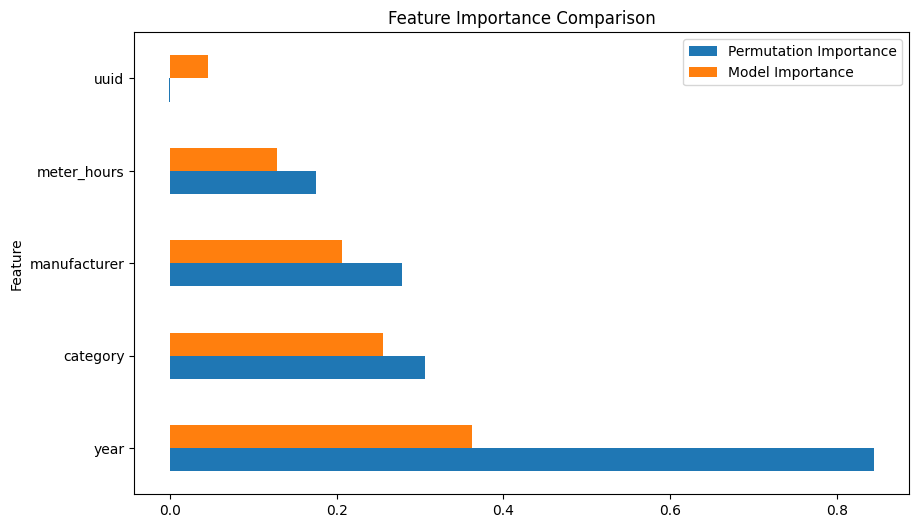

,Feature,Permutation Importance,Permutation Std Deviation,Model Importance,Feature Type,Permutation Rank,Model Rank
0,year,0.844728,0.080404,0.362952,int64,1,1.0
1,category,0.306508,0.023518,0.256086,int64,2,2.0
2,manufacturer,0.278040,0.019919,0.205989,int64,3,3.0
3,meter_hours,0.175156,0.010403,0.128759,int64,4,4.0
4,uuid,-0.000673,0.005008,0.046214,int16,5,5.0


In [6]:
import pandas as pd
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

def perm_importance_df(rf2, xs2, n_repeats=5, random_state=42):
    """
    Computes permutation importance for a trained model and outputs feature importance.

    Parameters:
    - rf: Trained Random Forest (or similar model).
    - xs: Tuple containing (X_train, X_test, y_train, y_test).
    - n_repeats: Number of times the feature is randomly shuffled (default is 5).
    - random_state: Random seed for reproducibility (default is 42).

    Returns:
    - importance_df: A DataFrame containing feature names, permutation importance,
                      model importance, and their respective ranks.
    """

    # Unpack the input tuple
    X_train, X_test, y_train, y_test = xs2

    # Compute Permutation Importance
    perm_importance = permutation_importance(
        rf2, X_test, y_test, n_repeats=n_repeats, random_state=random_state, n_jobs=-1
    )

    # Create the results DataFrame
    importance_df = pd.DataFrame({
        "Feature": rf2.feature_names_in_,
        "Permutation Importance": perm_importance.importances_mean,
        "Permutation Std Deviation": perm_importance.importances_std,
        "Model Importance": rf2.feature_importances_,
    })

    # Add feature type to the DataFrame (Optional)
    importance_df["Feature Type"] = [X_train[col].dtype for col in rf2.feature_names_in_]

    # Sort by Permutation Importance and assign ranks
    importance_df = importance_df.sort_values(by="Permutation Importance", ascending=False).reset_index(drop=True)
    importance_df["Permutation Rank"] = importance_df.index + 1
    importance_df["Model Rank"] = importance_df["Model Importance"].rank(ascending=False)

    # Plotting the feature importance comparison
    importance_df.sort_values(by="Permutation Importance", ascending=False).plot(
        x="Feature",
        y=["Permutation Importance", "Model Importance"],
        kind="barh",
        figsize=(10, 6),
        title="Feature Importance Comparison"
    )
    plt.show()

    # Display the DataFrame
    display(importance_df)

    return importance_df

# Example usage
importance_df = perm_importance_df(rf2, xs2)


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor  # Use Regressor since price is continuous
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier

# Assuming the dataset `df` contains a 'category' column and 'price' column

# Sample DataFrame - replace this with your actual dataset
# df = pd.read_csv("your_data.csv")

# Assuming 'category' is a categorical column (vehicle category) and 'price' is the target
# Load the renamed CSV file
data_path = '/root/.cache/kagglehub/datasets/equipmentradar/heavy-equipment-pricing-data/versions/1/data.csv'

# Load dataset using pandas
data = pd.read_csv(data_path)



# Define features X (including 'category') and target y ('price')
X = df.drop(columns=['price_usd','is_new','region','uuid'])  # Drop price column from features
y = df['price_usd']  # Target is the price column

feature_names = X.columns

def train_model(X, y):
    for col in X.columns:
        if X[col].dtype == 'object':
            X[col] = X[col].astype('category')

        if X[col].dtype == 'category':
            X[col] = X[col].cat.codes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_test_pred





array([ 25200, 100900,  20000,  76400,  37000,  29400,  28500, 132200,
        98300,  28900,  87500,  26100,  61500,  20000, 308700, 101100,
        10200,  86800,  44000,  74700,  28500,  29100,  22000,  16300,
        61400,  27900,  12600,  25200, 112200, 286300,  42300,  29000,
        11500,  86800,  46600,  26200, 106800, 169100, 165200,  24100,
        50300,  52200,  44200, 164500, 152900, 392900,  49400,  33000,
        60800,  47500,  17700,  60800,  23200,  55600,  57000, 127200,
       150900,  47500,  31600,  38100,  70100,  56400,  42800,  83500,
        10300, 171300,  56400,  74200,  39200,  56600, 155000, 155000,
        28700, 167300, 370100,  27200, 148000,  20900,  91900, 314300,
        43500,  72800,  12600,  64100, 155000, 265900,  39200,  10400,
        32600, 148700,  56600,  28500, 247200, 176100,  90600, 209300,
        38700, 228000,  28500,  27100, 324400,  13400,  32400,  71300,
       390500, 165400,  47500,  95800, 152100,  22800,  13400,  29100,
      

In [8]:
y_test == y_test_pred # True predictions
print('Correct predictions:', (y_test == y_test_pred).sum(), f", {(y_test == y_test_pred).mean():.2%}")
print('Incorrect predictions:', (y_test != y_test_pred).sum(), f", {(y_test != y_test_pred).mean():.2%}")

Correct predictions: 4 , 1.15%
Incorrect predictions: 345 , 98.85%
